In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('with_user_id.csv')

In [6]:
len(df)

1048575

In [7]:
df_us_samp = df[(df['lat']>0) & (df['lng']<0)].sample(frac=0.1, random_state=101)

In [8]:
len(df_us_samp)

93209

In [9]:
df_us_samp.head(2)

,userid,lat,lng
958713,4466,38.952334,-77.447948
444404,1544,39.763549,-86.331929


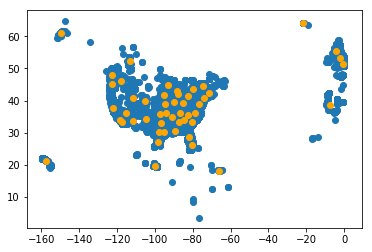

In [20]:
plt.scatter(df_us_samp['lng'], df_us_samp['lat'])
plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,0], color='orange')

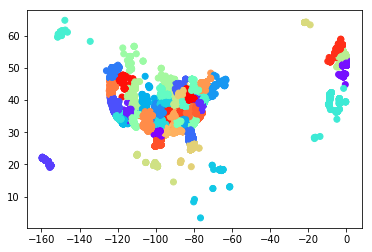

In [21]:
plt.scatter(df_us_samp['lng'], df_us_samp['lat'], cmap='rainbow',c=km.labels_)

In [22]:
df_us_samp.groupby('centers').count()

,userid,lat,lng
centers,,,
0,12003,12003,12003
1,2079,2079,2079
2,1896,1896,1896
3,3741,3741,3741
4,1511,1511,1511
5,10703,10703,10703
6,756,756,756
7,2670,2670,2670
8,3191,3191,3191


In [11]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=50)
km.fit(df_us_samp[['lat', 'lng']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
km.cluster_centers_

array([[  30.26934589,  -97.78465609],
       [  51.37963172,   -0.35045911],
       [  36.09172994, -115.14826755],
       [  38.97015467,  -76.88178464],
       [  21.28968866, -157.80697665],
       [  37.69423088, -122.17340195],
       [  43.06799516,  -88.50516563],
       [  28.47915321,  -81.73775013],
       [  48.02727485, -122.52430379],
       [  35.63969461,  -97.45069101],
       [  42.34833107,  -71.18056828],
       [  33.92869237,  -84.39776787],
       [  39.80110873, -105.166705  ],
       [  33.33376066, -117.1793915 ],
       [  18.05157775,  -66.22825051],
       [  39.02327927,  -94.83833337],
       [  32.87842018,  -96.93193646],
       [  34.02911142, -118.26396214],
       [  38.72221309,   -7.35935451],
       [  61.1172029 , -149.53287002],
       [  40.6943365 ,  -74.1108128 ],
       [  39.37699756,  -85.36725436],
       [  41.67733039,  -95.04291194],
       [  43.51703318,  -79.68321942],
       [  33.22732229,  -87.51413015],
       [  33.24802576,  -

In [13]:
for lat, lng in km.cluster_centers_:
    print (lat,",",lng)

30.269345891924587 , -97.7846560895568
51.37963172478592 , -0.35045911395363305
36.09172994402954 , -115.1482675467827
38.970154674028926 , -76.88178463840617
21.28968866035076 , -157.80697665215078
37.694230875089225 , -122.17340194887399
43.06799516419312 , -88.5051656339418
28.479153210483112 , -81.73775012949436
48.027274854149205 , -122.52430378605453
35.63969460505636 , -97.45069100542673
42.348331069080984 , -71.18056827821005
33.92869237120664 , -84.39776786712922
39.80110873243931 , -105.1667050008289
33.33376066178144 , -117.17939150484031
18.051577754624272 , -66.2282505081503
39.02327927142132 , -94.83833336852402
32.87842018163755 , -96.93193645511977
34.02911141834621 , -118.26396213893415
38.72221309143498 , -7.359354514990969
61.1172029021875 , -149.53287002343748
40.69433649840327 , -74.11081279681567
39.37699755715572 , -85.36725435913591
41.67733038964028 , -95.0429119361151
43.5170331772666 , -79.68321942361887
33.227322290325 , -87.514130146525
33.24802576160069 , 

In [15]:
km.labels_[:5], len(km.labels_)

(array([ 3, 21, 10,  0,  7]), 93209)

In [16]:
df_us_samp['centers'] = km.labels_

In [18]:
df_us_samp[df_us_samp['centers']==3]

,userid,lat,lng,centers
958713,4466,38.952334,-77.447948,3
666782,2845,38.892786,-77.022926,3
454502,1614,39.735197,-75.459206,3
714939,3087,39.179845,-76.670966,3
695353,2996,38.637294,-77.293980,3
454759,1617,39.979429,-76.733379,3
945892,4349,38.922889,-77.227582,3
628019,2669,37.648557,-77.693566,3
754908,3229,38.850537,-77.041025,3
474515,1721,36.830361,-76.067375,3


In [38]:
km.cluster_centers_[12]

array([ 38.85437184, -77.11848174])

In [45]:
df_us_samp.head(2)

,userid,lat,lng,centers
958713,4466,38.952334,-77.447948,12
444404,1544,39.763549,-86.331929,26


In [23]:
y = df_us_samp['centers']
X = df_us_samp[['lat','lng']]

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=101, test_size=0.3)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
y_pred = knn.predict(X_test)

In [53]:
sum(y_pred == y_test), len(y_test)

(27894, 27963)

In [54]:
27894/27963

0.9975324535993992

In [28]:
knn.predict([[41.087632,-115.487128]])

array([29])

In [30]:
km.cluster_centers_[29]

array([  40.80688156, -111.72925747])

In [33]:
df_us_samp[df_us_samp['centers']==29]['userid'].unique()

array([ 185,  360, 2276, 2277,  567, 4088, 2075, 3730, 3411, 3049, 2164,
       1921, 3329, 3541, 2488, 3240, 1662, 2548, 3251, 2494, 3351, 3438,
       4632, 2744, 1122, 3462, 2734, 4302, 4748, 2305,  633, 3075, 2835,
       2001, 2590, 2566, 2421, 2310, 1114, 1867,  583, 1618,  458, 3418,
       2483, 4669, 1523, 1839, 1309, 2056, 4503,  138, 4093,  908, 3395,
       3144, 3964, 1174, 3558,  498,  752, 2547, 2620, 4242, 1146, 3087,
        661, 4445, 4352,  745, 1014, 1891, 2960, 4366, 3769, 2856, 2350,
       2194, 4371, 2151, 1007, 4363, 2866, 3303, 3488, 3373, 4151, 3234],
      dtype=int64)